<a href="https://colab.research.google.com/github/Ghiles1010/checkpoints/blob/main/Checkpoint_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1283]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt 
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring Data

In [1284]:
df = pd.read_csv("titanic-passengers.csv", sep=";")

In [1285]:
# Head
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [1286]:
df[~df["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
16,378,No,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
19,225,Yes,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
26,588,Yes,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
...,...,...,...,...,...,...,...,...,...,...,...,...
862,619,Yes,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
863,858,Yes,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
865,196,Yes,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
875,463,No,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S


In [1287]:
# general information about the values
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1288]:
# info about type of the values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [1289]:
# Let's start by checking the percentage of null values in each column
print("Pecentage of missing values : \n")
(df.isnull().sum() / df.shape[0])*100

Pecentage of missing values : 



PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# Preprocessing

In [1290]:
"""
We can see that the "Cabin" attribute has 77% of null values, we have a huge loss of data
Thus, filling the NaN values with mean, mode, or median is not reliable. That's why it's better
to just drop the column. We are not gaining information from it anyway
"""

df.drop("Cabin", axis = 1, inplace = True)

In [1291]:
"""
We can already be sure
that the ID of a passenger doesn't affect his survival chances,
so we can already drom the PassengerId column 
"""
df.drop("PassengerId", axis = 1, inplace = True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S


In [1292]:
"""
The number of the ticker won't bring any information of the chances of survival either
we can drop it
"""

df.drop("Ticket", axis=1, inplace=True)

In [1293]:
"""
Age and Embarked features have relatively lower percentage of missing values
So we will fill re missing values with the mean for the Age property, and with the
most common value for the embarked property (since it has a categorical values)
"""

df['Age'].fillna(df['Age'].mean(), inplace = True)

# get the most common value
values = df['Embarked'].value_counts()
most_common_value = values[values == values.max()].index[0]

df['Embarked'].fillna(most_common_value, inplace = True)

In [1294]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,S
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S
2,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,S
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,S
4,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,S


# Feature Transformation

In [1295]:
# chacking the possible values of attribute Embarked
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [1296]:
"""
We can see that we have categorical attributes which are : 
Survived, Sex and Embarked. We can use the label encoder method
to turn them into numerical values 
"""

transform_cat = {"Survived" : {'Yes' : 1, 'No' : 0},
                 "Sex" : {"male" : 1, 'female' : 0}}
df.replace(transform_cat, inplace=True)


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Embarked"] = encoder.fit_transform(df["Embarked"])

In [1297]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2


# Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


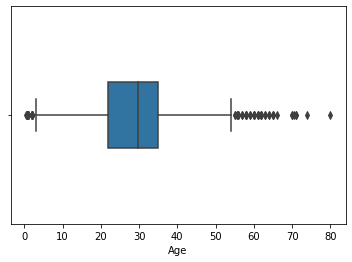

In [1298]:
# Let's visualize the distribution of the age
data = pd.DataFrame()
sns.boxplot(df['Age'], width = 0.3)

In [1299]:
"""
We can see that most of the passengers have between 20 and 35 years old
"""

'\nWe can see that most of the passengers have between 20 and 35 years old\n'

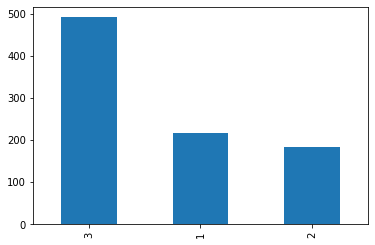

In [1300]:
# Let's visualize the distribution of the Pclass
df['Pclass'].value_counts().plot.bar()

In [1301]:
"""
We can see that the majority is a third class passengers
"""

'\nWe can see that the majority is a third class passengers\n'

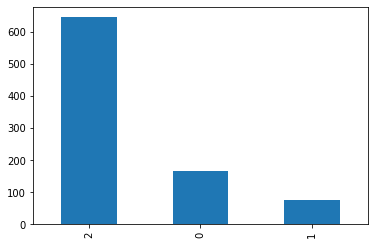

In [1302]:
df['Embarked'].value_counts().plot.bar()

In [1303]:
"""
Most of passengers embarked from port number 2
"""

'\nMost of passengers embarked from port number 2\n'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Male')

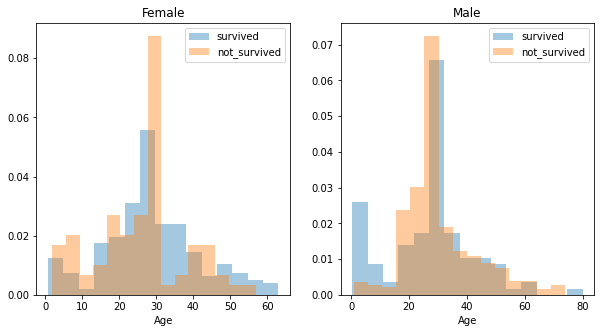

In [1304]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))

women = df[df['Sex']==0]
men = df[df['Sex']==1]

# Plot the female part
nb_women = women.shape[0]
ax = sns.distplot(women[women['Survived']==1].Age, bins=15, norm_hist=True,
                  label = "survived", ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age, bins=15, norm_hist=True,
                  label = "not_survived", ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

# Plot the Male part
nb_men = men.shape[0]
ax = sns.distplot(men[men['Survived']==1].Age, bins=15, norm_hist=True,
                  label = "survived", ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age, bins=15, norm_hist=True,
                  label = "not_survived", ax = axes[1],  kde = False)
ax.legend()
ax.set_title('Male')


In [1305]:
"""
We can see that there's a lot of deaths for the people between 20 and 45
BUT there is also a lot of people with age between 20 and 40 as the distribution
shows.

"""

"\nWe can see that there's a lot of deaths for the people between 20 and 45\nBUT there is also a lot of people with age between 20 and 40 as the distribution\nshows.\n\n"

In [1306]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts() 
    not_survived = df[df['Survived']==0][feature].value_counts()
    buf = pd.DataFrame([survived,not_survived])
    buf.index=['Survived','not_survived']
    buf.plot(kind='bar',stacked=True,fig=(18,6),title=feature)

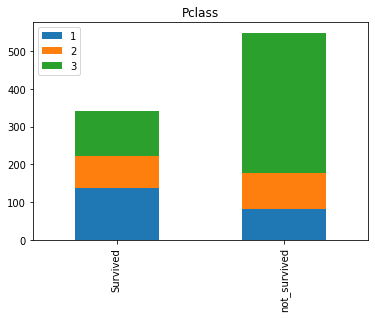

In [1307]:
bar_chart("Pclass")

In [1308]:
"""
We can see that the number of people who
survived in first class are twice more important than
the first class who did not survived, furthermore, even
is there is more people is 3rd class, the number of people who
survived if first class is more important than the number of people 
who survived in thirs class
""" 

'\nWe can see that the number of people who\nsurvived in first class are twice more important than\nthe first class who did not survived, furthermore, even\nis there is more people is 3rd class, the number of people who\nsurvived if first class is more important than the number of people \nwho survived in thirs class\n'

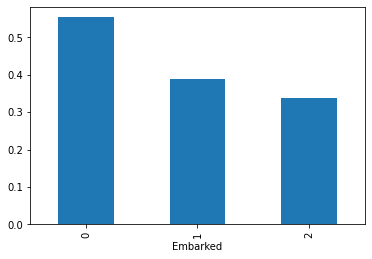

In [1309]:
df.groupby("Embarked").Survived.mean().plot.bar()

In [1310]:
"""
We cann see that people who embarekd from port 0
had more chances to survive
"""

'\nWe cann see that people who embarekd from port 0\nhad more chances to survive\n'

In [1311]:
def plot_correlation_map( df ):

    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )

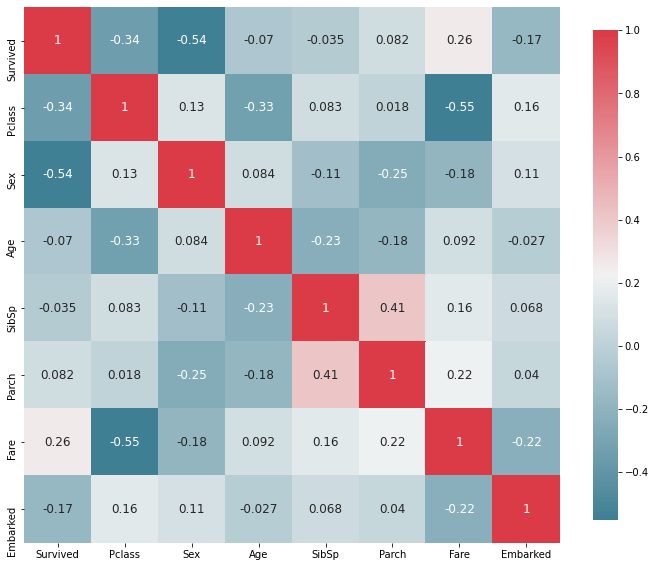

In [1312]:
plot_correlation_map(df)

In [1313]:
"""
This function calculates the linear correlation between all different possible
pairs, the most correlated pairs appear in red or green.

The pairs that stand out are : 
(Pclass, Fare), (sex, survived) and (SibSp, Parch)

The (Pclass, Fare) is expectable, since the higher the class is (3rd class is
higher than 1st class numerically), the poorer are the passengers, that's why
we have a negative correlation that is pretty segnificant.

We have encoded male as being 1, and female as being 0. the pair (survived, sex)
has a significant negative correlation, We have already put in evidance this 
correlation when we studied the impact of age and sex earlier.

(sibsp, parch) high correlation simply means that people who travel with their 
siblings an spouses also travel with their parents and children. and viceversa
"""


"\nThis function calculates the linear correlation between all different possible\npairs, the most correlated pairs appear in red or green.\n\nThe pairs that stand out are : \n(Pclass, Fare), (sex, survived) and (SibSp, Parch)\n\nThe (Pclass, Fare) is expectable, since the higher the class is (3rd class is\nhigher than 1st class numerically), the poorer are the passengers, that's why\nwe have a negative correlation that is pretty segnificant.\n\nWe have encoded male as being 1, and female as being 0. the pair (survived, sex)\nhas a significant negative correlation, We have already put in evidance this \ncorrelation when we studied the impact of age and sex earlier.\n\n(sibsp, parch) high correlation simply means that people who travel with their \nsiblings an spouses also travel with their parents and children. and viceversa\n"

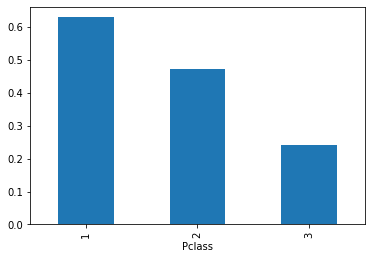

In [1314]:
df.groupby("Pclass").Survived.mean().plot.bar()

In [1315]:
"""
We can see that chances to survive being in First class
are higher than chances to survive being in second class
and third class
"""

'\nWe can see that chances to survive being in First class\nare higher than chances to survive being in second class\nand third class\n'

In [1316]:
# new column title
# We extract every word finishin with a point with this
# regular expression
df['Title'] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2,Mr
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2,Mrs
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2,Mr


In [1317]:
# Now we have to encode it
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Title"] = encoder.fit_transform(df["Title"])

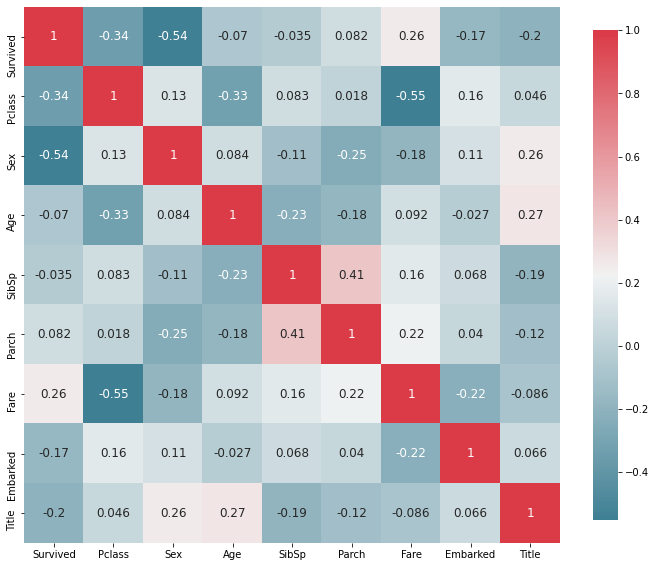

In [1318]:
plot_correlation_map(df)

In [1319]:
"""
We can see that Title is correlated with sex and age
This is expectable since the titles depend of the sex
and the age
"""

'\nWe can see that Title is correlated with sex and age\nThis is expectable since the titles depend of the sex\nand the age\n'

In [1320]:
# replacing titles

Title_Dictionary = {

                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess": "Royalty",
                    "Dona":       "Royalty",

                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",

                    "Master" :    "Master"
                    }

In [1321]:
# let's reextract titles
df['Title'] = df["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
# now we replace them
df["Title"].replace(Title_Dictionary, inplace=True)
# now we rencode them
encoder = LabelEncoder()
df["Title"] = encoder.fit_transform(df["Title"])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2,3
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2,3
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2,3
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2,3
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2,3


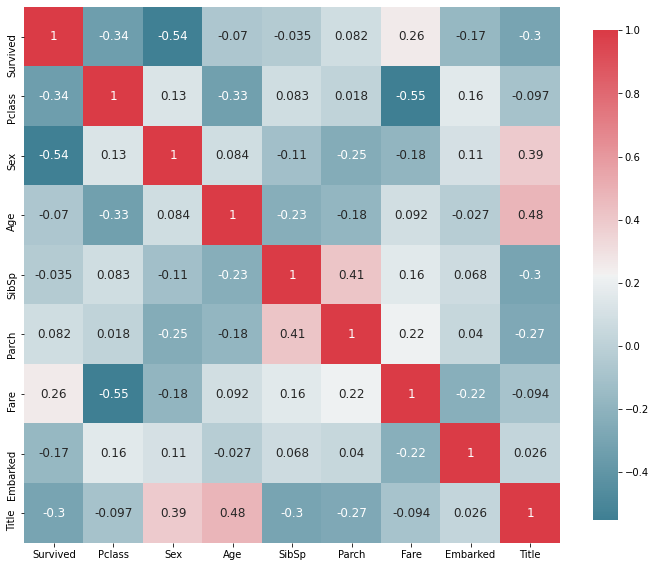

In [1322]:
plot_correlation_map(df)

In [1323]:
"""
We can see that the correlation are more pronounced
"""

'\nWe can see that the correlation are more pronounced\n'

In [1324]:
df["FamilySize"] = df["SibSp"] + df["Parch"]
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,2,3,0
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,2,3,0
2,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,2,3,0
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,2,3,4
4,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,2,3,1


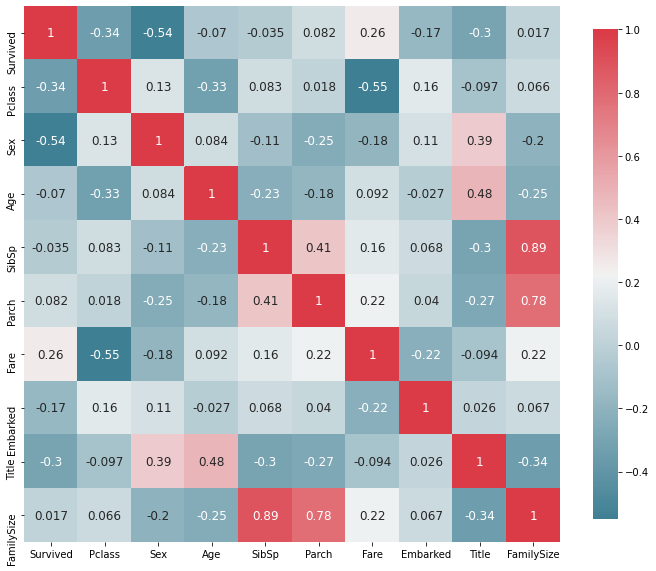

In [1325]:
# let'splot the correlation to see if we gained informations
plot_correlation_map(df)

In [1326]:
"""
The FamilySize is usefull because it reduces the dimensionality of the data
without loss of information, we can delete SibSp and Parchif we keep it

"""

'\nThe FamilySize is usefull because it reduces the dimensionality of the data\nwithout loss of information, we can delete SibSp and Parchif we keep it\n\n'

In [1327]:
# delete useless features (cleaning)

In [1328]:
df.drop("SibSp", axis = 1, inplace = True)
df.drop("Parch", axis = 1, inplace=True)
# we can delete name
df.drop("Name", axis = 1, inplace=True)
# the title depend a lot of sex and age, we can drop it
df.drop("Title", axis = 1, inplace=True)
# Fare is correlated with Pclass, we can drop it
df.drop("Fare", axis = 1, inplace=True)

# Final Dataset

In [1329]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,FamilySize
0,0,2,1,28.0,2,0
1,0,3,1,25.0,2,0
2,0,3,1,20.0,2,0
3,0,3,0,29.0,2,4
4,0,1,1,31.0,2,1


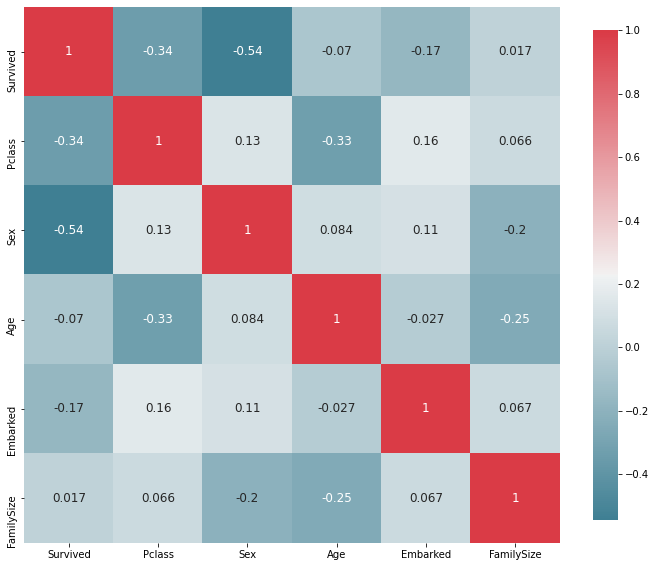

In [1330]:
plot_correlation_map(df)

# All of the above is from checkpoint 2

In [1331]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,FamilySize
0,0,2,1,28.0,2,0
1,0,3,1,25.0,2,0
2,0,3,1,20.0,2,0
3,0,3,0,29.0,2,4
4,0,1,1,31.0,2,1


# Tranforming features

In [1332]:
"""
Since "Embareked" feature in a nominal feature,
we need to one-hot encode it.
"""

embarked_one_hot = pd.get_dummies(df["Embarked"])
embarked_one_hot.columns = ["Embarked_0", "Embarked_1", "Embarked_2" ]
df = pd.concat([df, embarked_one_hot], axis = 1)

df.drop("Embarked", axis = 1, inplace = True)

In [1333]:
df.head()

,Survived,Pclass,Sex,Age,FamilySize,Embarked_0,Embarked_1,Embarked_2
0,0,2,1,28.0,0,0,0,1
1,0,3,1,25.0,0,0,0,1
2,0,3,1,20.0,0,0,0,1
3,0,3,0,29.0,4,0,0,1
4,0,1,1,31.0,1,0,0,1


In [1348]:
# calculating z_scores
columns = ["Age", "FamilySize", "Pclass"]
for column in columns:

  mu, std = df[column].mean(), df[column].std()
  df[column] = (df[column] - mu) / std

In [1349]:
df.head()

,Survived,Pclass,Sex,Age,FamilySize,Embarked_0,Embarked_1,Embarked_2
0,0,-0.369158,1,-0.130681,-0.560660,0,0,1
1,0,0.826913,1,-0.361415,-0.560660,0,0,1
2,0,0.826913,1,-0.745970,-0.560660,0,0,1
3,0,0.826913,0,-0.053770,1.918486,0,0,1
4,0,-1.565228,1,0.100052,0.059127,0,0,1


# Logistic Regression

In [1365]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#features extraction
y = df['Survived']
x = df.drop("Survived", axis = 1)


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)  

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  

y_pred  = logreg.predict(x_test)    


acc = accuracy_score(y_test, y_pred)


print("Accuracy = %.2f" % acc)

Accuracy = 0.84


In [1362]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       118
           1       0.82      0.69      0.75        61

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179



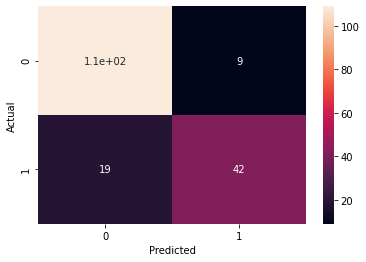

In [1363]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

# ROC / AUC

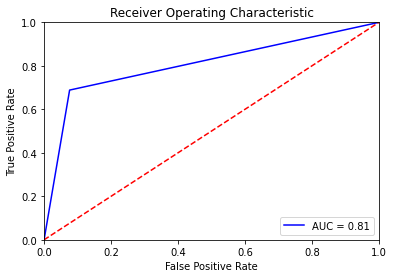

In [1364]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()